In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
from parameters import plotting_parameters
plt.rc('xtick', labelsize=plotting_parameters.axis_tick_size()) 
plt.rc('ytick', labelsize=plotting_parameters.axis_tick_size()) 

In [20]:
data = pd.read_csv('../../data/ML_AND_Integration_AND_Multiomics.csv')

In [21]:
data.head()

Unnamed: 0                                 Full name of paper  \
0           0  A gene prioritization method based on a swine ...   
1           1  A hierarchical integration deep flexible neura...   
2           2  A machine learning framework that integrates m...   
3           3  A multi-omics interpretable machine learning m...   
4           4  A Novel MKL Method for GBM Prognosis Predictio...   

                                          Doi  Year  Month  \
0  https://doi.org/10.1038/s42003-020-01233-4  2020      9   
1   https://doi.org/10.1186/s12859-019-3116-7  2019     10   
2  https://doi.org/10.1186/s12859-021-04256-8  2021      6   
3  https://doi.org/10.1038/s41598-020-57691-7  2020      1   
4                   10.1109/JBHI.2019.2898471  2020      1   

                Author email TGCA?  Number citations  \
0    shzhao@mail.hzau.edu.cn   NaN                15   
1         ise_wup@ujn.edu.cn     1                40   
2         zzuliszhen@163.com   NaN                 9   
3     fraenkel-admin@mit.edu   NaN                20   
4   zhangya@mail.ustc.edu.cn   NaN                18   

                                 Other (state which)  Autoencoder  ...  \
0  integrates affinity matrix and network fusion ...          NaN  ...   
1                                                NaN          1.0  ...   
2                                                NaN          NaN  ...   
3                                                NaN          NaN  ...   
4                                                NaN          NaN  ...   

                                Dataset  \
0                                   OWN   
1                TGCA ( BRCA, GBM, OV )   
2  LncRNA expression data from EMBL-EBI   
3                                   OWN   
4                           TCGA-\nGBM    

                                        Dataset2  \
0                                            NaN   
1                                            NaN   
2  HMDD v3.0 database [67] and DisGeNet database   
3                                            NaN   
4                                     cBioportal   

                                            Dataset3  TCGA  OWN  OTHER  \
0                                                NaN   NaN  1.0    NaN   
1                                                NaN   1.0  NaN    NaN   
2  LncRNADisease v2.0 [38], Lnc2Cancer\n\n[13], a...   NaN  NaN    1.0   
3                                                NaN   NaN  1.0    NaN   
4                                                NaN   1.0  NaN    NaN   

   single-paper sets  Updated_DB_TCGA Updated_DB_Other  Updated_DB_exclude  
0                NaN              NaN              1.0                 NaN  
1                NaN              1.0              NaN                 NaN  
2                NaN              NaN              1.0                 NaN  
3                NaN              NaN              1.0                 NaN  
4                NaN              1.0              NaN                 NaN  

[5 rows x 206 columns]

In [22]:
data.index = data['Full name of paper']

In [23]:
relevant_cols = ['Difficult to categorise',	'None',	'Clustering to find survival subtypes',	'Predict response to interventions',	'Survival prediction',	'Disease progression (eg early vs late stage)',	'Patient/organism subtype (eg age, gender, disease risk)',	'Disease subtype',	'Disease A vs Disease B',	'Disease vs no disease',	'Individual omic level',	'Association of omic to disease/ condition']

In [24]:
for col in data.columns:
    if col not in relevant_cols:
        data = data.drop(col, axis=1)

In [25]:
# Renaming for convention
data.rename(columns = {"Disease vs no disease": "Case vs control"}, inplace=True)

In [26]:
data.columns

Index(['Difficult to categorise', 'None',
       'Clustering to find survival subtypes',
       'Predict response to interventions', 'Survival prediction',
       'Disease progression (eg early vs late stage)',
       'Patient/organism subtype (eg age, gender, disease risk)',
       'Disease subtype', 'Disease A vs Disease B', 'Case vs control',
       'Individual omic level', 'Association of omic to disease/ condition'],
      dtype='object')

In [27]:
data[data['Difficult to categorise'] == 1]

Empty DataFrame
Columns: [Difficult to categorise, None, Clustering to find survival subtypes, Predict response to interventions, Survival prediction, Disease progression (eg early vs late stage), Patient/organism subtype (eg age, gender, disease risk), Disease subtype, Disease A vs Disease B, Case vs control, Individual omic level, Association of omic to disease/ condition]
Index: []

In [28]:
data.columns

Index(['Difficult to categorise', 'None',
       'Clustering to find survival subtypes',
       'Predict response to interventions', 'Survival prediction',
       'Disease progression (eg early vs late stage)',
       'Patient/organism subtype (eg age, gender, disease risk)',
       'Disease subtype', 'Disease A vs Disease B', 'Case vs control',
       'Individual omic level', 'Association of omic to disease/ condition'],
      dtype='object')

In [29]:
# Drop our answers
data_drop_answer_and_comment = data.drop(['Difficult to categorise', 'Clustering to find survival subtypes'], axis=1)
data_drop_answer_and_comment.head()

None  \
Full name of paper                                         
A gene prioritization method based on a swine m...   NaN   
A hierarchical integration deep flexible neural...   NaN   
A machine learning framework that integrates mu...   NaN   
A multi-omics interpretable machine learning mo...   1.0   
A Novel MKL Method for GBM Prognosis Prediction...   NaN   

                                                    Predict response to interventions  \
Full name of paper                                                                      
A gene prioritization method based on a swine m...                                NaN   
A hierarchical integration deep flexible neural...                                NaN   
A machine learning framework that integrates mu...                                NaN   
A multi-omics interpretable machine learning mo...                                NaN   
A Novel MKL Method for GBM Prognosis Prediction...                                NaN   

                                                    Survival prediction  \
Full name of paper                                                        
A gene prioritization method based on a swine m...                  NaN   
A hierarchical integration deep flexible neural...                  NaN   
A machine learning framework that integrates mu...                  NaN   
A multi-omics interpretable machine learning mo...                  NaN   
A Novel MKL Method for GBM Prognosis Prediction...                  1.0   

                                                    Disease progression (eg early vs late stage)  \
Full name of paper                                                                                 
A gene prioritization method based on a swine m...                                           NaN   
A hierarchical integration deep flexible neural...                                           NaN   
A machine learning framework that integrates mu...                                           NaN   
A multi-omics interpretable machine learning mo...                                           NaN   
A Novel MKL Method for GBM Prognosis Prediction...                                           NaN   

                                                    Patient/organism subtype (eg age, gender, disease risk)  \
Full name of paper                                                                                            
A gene prioritization method based on a swine m...                                                NaN         
A hierarchical integration deep flexible neural...                                                NaN         
A machine learning framework that integrates mu...                                                NaN         
A multi-omics interpretable machine learning mo...                                                NaN         
A Novel MKL Method for GBM Prognosis Prediction...                                                NaN         

                                                    Disease subtype  \
Full name of paper                                                    
A gene prioritization method based on a swine m...              NaN   
A hierarchical integration deep flexible neural...              1.0   
A machine learning framework that integrates mu...              NaN   
A multi-omics interpretable machine learning mo...              NaN   
A Novel MKL Method for GBM Prognosis Prediction...              NaN   

                                                    Disease A vs Disease B  \
Full name of paper                                                           
A gene prioritization method based on a swine m...                     NaN   
A hierarchical integration deep flexible neural...                     NaN   
A machine learning framework that integrates mu...                     NaN   
A multi-omics interpretable machine learning mo...                     NaN   
A Novel MKL Method for GBM Prognosis

In [30]:
histogram_data = data_drop_answer_and_comment.sum(axis=0) 
histogram_data

/var/folders/wl/hg987ghd6mz8h66gkk6xwp180000gn/T/ipykernel_26967/1081928034.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  histogram_data = data_drop_answer_and_comment.sum(axis=0)


None                                                        4.0
Predict response to interventions                          12.0
Survival prediction                                        35.0
Disease progression (eg early vs late stage)                5.0
Patient/organism subtype (eg age, gender, disease risk)     6.0
Disease subtype                                            31.0
Disease A vs Disease B                                      2.0
Case vs control                                             7.0
Individual omic level                                       5.0
dtype: float64

In [31]:
sorted_data = histogram_data.sort_values(ascending=False)

In [32]:
sorted_data.index

Index(['Survival prediction', 'Disease subtype',
       'Predict response to interventions', 'Case vs control',
       'Patient/organism subtype (eg age, gender, disease risk)',
       'Disease progression (eg early vs late stage)', 'Individual omic level',
       'None', 'Disease A vs Disease B'],
      dtype='object')

In [33]:
sorted_data.index = ['Survival prediction', 'Disease subtype',
       'Predict response to interventions', 'Case vs control',
       'Patient/organism subtype (eg age, gender, disease risk)',
       'Disease progression (eg early vs late stage)', 'Individual omic level',
       'None', 'Disease A vs Disease B']

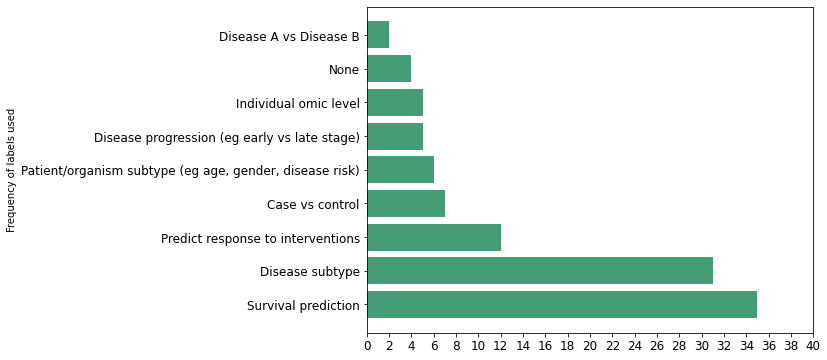

In [34]:
plt.rcParams["figure.figsize"] = (8,6)
plt.barh(y = sorted_data.index, 
        width =sorted_data,
        color=plotting_parameters.green )
plt.xticks(np.linspace(0,40,21))
plt.ylabel('Frequency of labels used')
plt.savefig("../../figures/Goals_labels.png", dpi=400, bbox_inches = "tight")
plt.savefig("../../figures/Goals_labels.pdf", dpi=400, bbox_inches = "tight")
